## RANDOM FOREST REGRESSION

## uso Bel, Awa, epi, CHI----> BEH

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

df= pd.read_csv('FULL_DATA5_FINALE.csv')

dl=df[['pct_mask',
      'pct_worried_catch_covid','pct_belief_masking_effective',
     'pct_received_news_local_health','pct_received_news_experts','pct_received_news_who','pct_received_news_govt_health' ,'pct_received_news_politicians','pct_received_news_journalists','pct_received_news_friends',
     'new_cases_smoothed','new_deaths_smoothed',
     'Containment health index',
     
     ]]


dl = dl.dropna()
y = dl["pct_mask"] #output--target
X = dl.drop(columns=["pct_mask"])  #input--features


#train set e test set           20% dati preso per il test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) # random_state= seme per ividere dati sempre nello stesso modo

param_dist = {
    'max_depth': randint(5, 20),          # valori da 5 a 20
    'min_samples_leaf': randint(1, 20),   # valori da 1 a 20
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestRegressor(n_estimators=300, random_state=42)
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,            # numero di combinazioni casuali da testare
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1             # usa tutti i core disponibili
)
random_search.fit(X, y) 
best_params = random_search.best_params_
print("Best params:", best_params)
#print("Best R²:", random_search.best_score_)


Best params: {'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 6}


RMSE: 0.0599
R2 Score: 0.9496


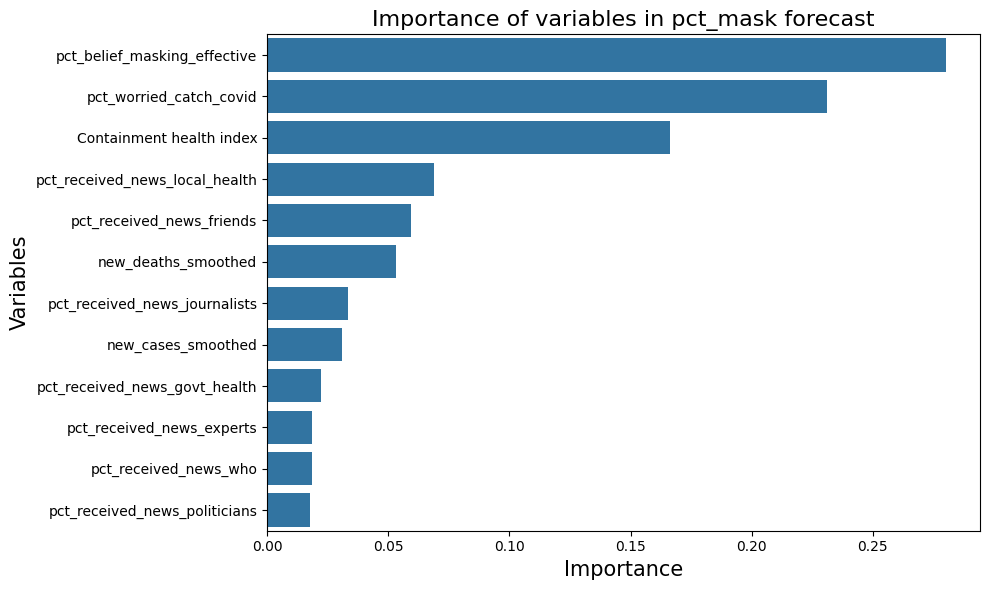

pct_worried_catch_covid           0.230953
pct_belief_masking_effective      0.280198
pct_received_news_local_health    0.068712
pct_received_news_experts         0.018701
pct_received_news_who             0.018396
pct_received_news_govt_health     0.022036
pct_received_news_politicians     0.017584
pct_received_news_journalists     0.033447
pct_received_news_friends         0.059558
new_cases_smoothed                0.030813
new_deaths_smoothed               0.053243
Containment health index          0.166358
dtype: float64
=== PERFORMANCE RANDOM FOREST ===
R² Train: 0.974
R² Test:  0.950
MSE Train: 0.002
MSE Test:  0.004
OOB Score: 0.955


In [ ]:
# modello
rf = RandomForestRegressor(
    n_estimators=300,                
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42,
    oob_score=True
)
rf.fit(X_train, y_train) #addestra il modello usando i dati di training

# predizione
y_pred = rf.predict(X_test) #predice pcct_mask guardando ai valori di input

# valutazione del modello
mse = mean_squared_error(y_test, y_pred) #percentuale di quanto sono in media lontane le previsioni del modello dai valori reali. (voglio basso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred) #quanto il modello spiega la variabilità dei dati reali (1 è perfetto, 0 il modello non spiega nulla) (voglio alto)
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Importanza delle variabili
importances = rf.feature_importances_ #feature_importances_ dice quanto ogni variabile aiuta a predire output nel modello
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)


plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.sort_values(ascending=False), y=feat_importances.sort_values(ascending=False).index)
plt.title("Importance of variables in pct_mask forecast", fontsize=16)
plt.xlabel("Importance", fontsize=15)
plt.ylabel("Variables", fontsize=15)
plt.tight_layout()
plt.savefig(r'C:\Users\user\Desktop\immaginitt\immparte2correlazione\randomforestbeh.png', dpi=300, bbox_inches='tight')
plt.show()
print(feat_importances)



# Predizioni
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Metriche Train
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

# Metriche Test
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# OOB score
oob_score = rf.oob_score_

print("=== PERFORMANCE RANDOM FOREST ===")
print(f"R² Train: {r2_train:.3f}")
print(f"R² Test:  {r2_test:.3f}")
print(f"MSE Train: {mse_train:.3f}")
print(f"MSE Test:  {mse_test:.3f}")
print(f"OOB Score: {oob_score:.3f}")



In [6]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Bias-Variance decomposition
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    rf,        # modello
    X_train.values, y_train.values,  # training data
    X_test.values, y_test.values,    # test data
    loss='mse',
    num_rounds=50,   # numero di ripetizioni
    random_seed=42
)

print(f"Bias^2: {avg_bias:.3f}, Variance: {avg_var:.3f}, MSE: {avg_expected_loss:.3f}")


Bias^2: 0.004, Variance: 0.000, MSE: 0.004


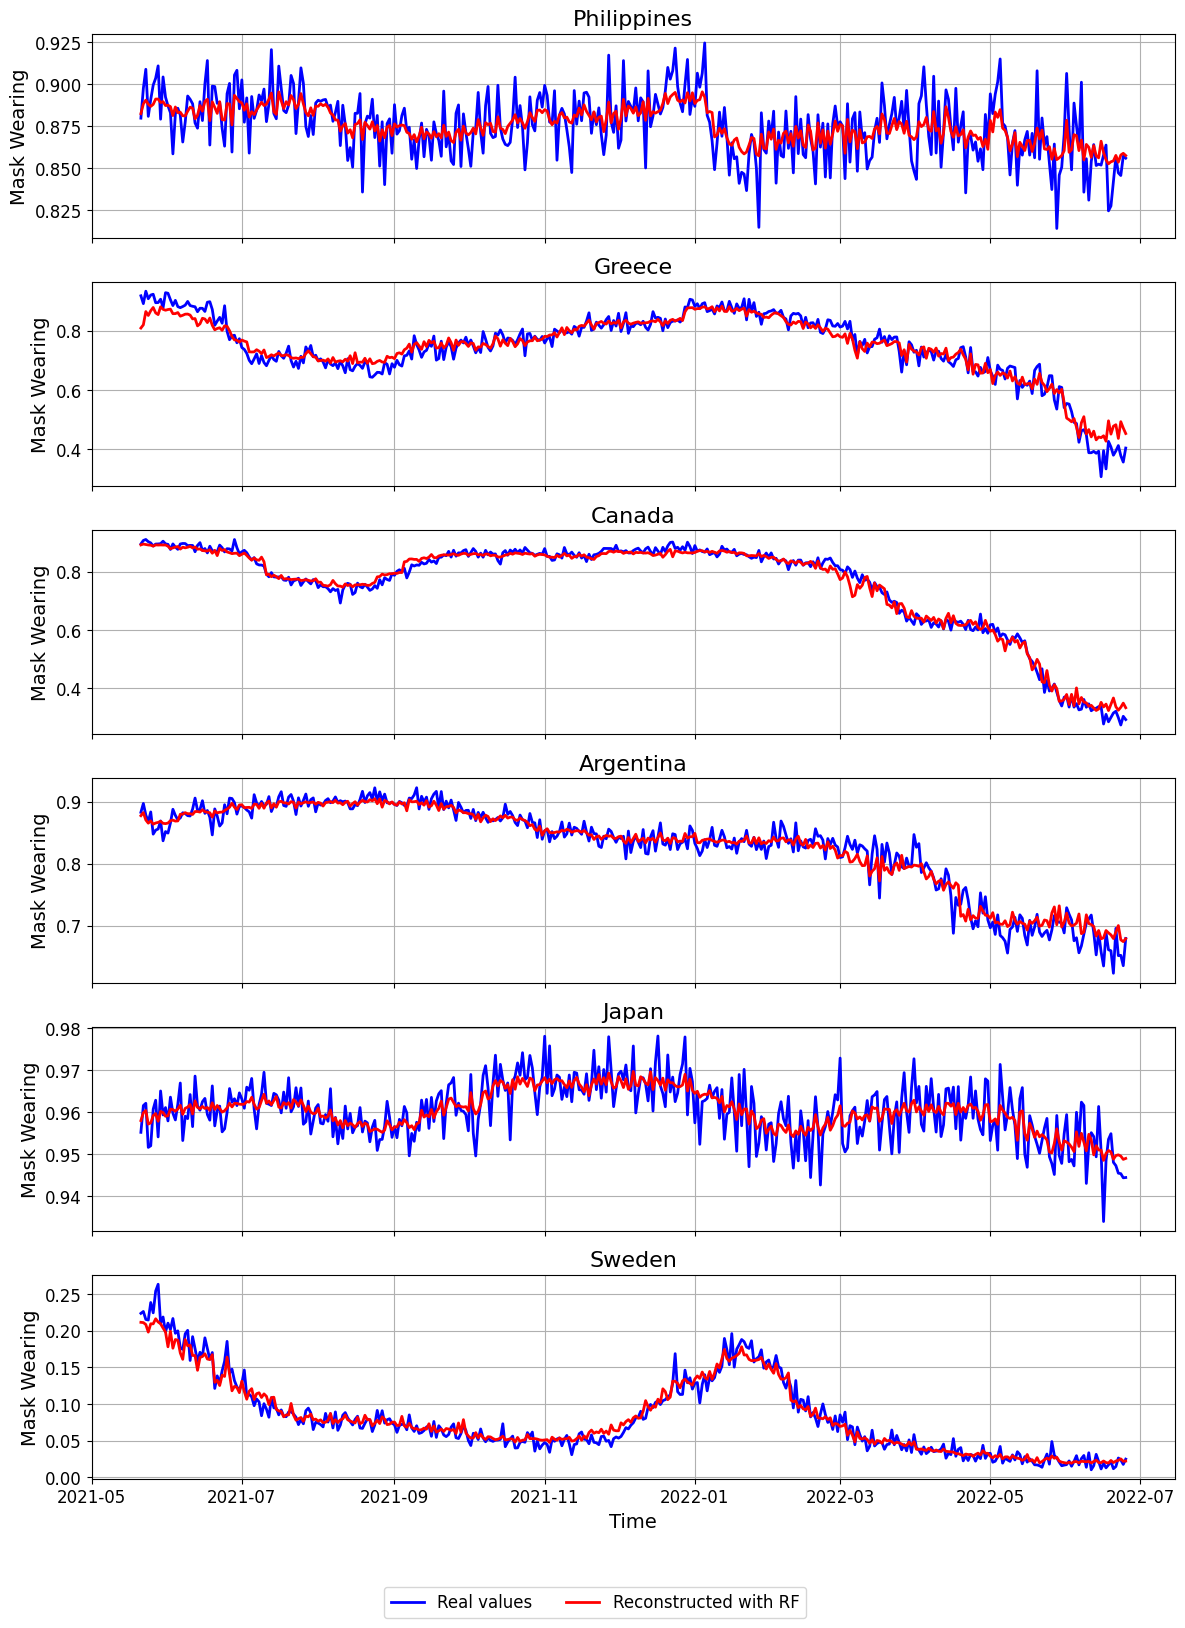

In [5]:
df = pd.read_csv('FULL_DATA5_FINALE.csv', parse_dates=['survey_date'])
selected_countries = ['Philippines', 'Greece', 'Canada', 'Argentina', 'Japan', 'Sweden']
save_path = r'C:\Users\user\Desktop\immaginitt\immparte2correlazione' 

# Modello Random Forest
#rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf = RandomForestRegressor(
    n_estimators=300,                
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42,
    oob_score=True
)
fig, axes = plt.subplots(len(selected_countries), 1, figsize=(12, 16), sharex=True)

for i, country in enumerate(selected_countries):
    df_country = df[df['country'] == country].copy()

    dl = df_country[['survey_date', 'pct_mask',
                     'pct_worried_catch_covid','pct_belief_masking_effective',
                     'pct_received_news_local_health','pct_received_news_experts','pct_received_news_who','pct_received_news_govt_health',
                     'pct_received_news_politicians','pct_received_news_journalists','pct_received_news_friends',
                     'new_cases_smoothed','new_deaths_smoothed','Containment health index']]

    dl = dl.dropna()

    date_col = dl['survey_date']
    y_all = dl['pct_mask']
    X_all = dl.drop(columns=['pct_mask', 'survey_date'])

    rf.fit(X_all, y_all)
    y_pred_all = rf.predict(X_all)

    results_df = pd.DataFrame({
        'survey_date': date_col,
        'true_mask': y_all,
        'predicted_mask': y_pred_all
    }).sort_values('survey_date')

    ax = axes[i]

    ax.plot(results_df['survey_date'], results_df['true_mask'], label='Real values', color='blue', linewidth=2)
    ax.plot(results_df['survey_date'], results_df['predicted_mask'], label='Reconstructed with RF', color='red', linewidth=2)

    ax.set_title(f'{country}', fontsize=16)
    ax.set_ylabel('Mask Wearing', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True)

axes[-1].set_xlabel('Time', fontsize=14)  # etichetta asse x solo nell’ultimo subplot

# Legenda unica sotto tutti i subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.02))
plt.tight_layout(rect=[0, 0.03, 1, 1]) 
fig.savefig(f'{save_path}\\rf_mask_all_countries.png', dpi=300, bbox_inches='tight')
plt.show()

## uso Bel, Awa, Tru, Beh, CHI-------> Cases

In [6]:
df= pd.read_csv('FULL_DATA5_FINALE.csv')

dl=df[['pct_mask',
      'pct_worried_catch_covid','pct_belief_masking_effective',
     'pct_received_news_local_health','pct_received_news_experts','pct_received_news_who','pct_received_news_govt_health' ,'pct_received_news_politicians','pct_received_news_journalists','pct_received_news_friends',
     'new_cases_smoothed','new_deaths_smoothed',
     'Containment health index',
     
     ]]
dl = dl.dropna()
y = dl["new_cases_smoothed"] #output--target
X = dl.drop(columns=["new_cases_smoothed", "new_deaths_smoothed"])  #input--features

#train set e test set           20% dati preso per il test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) # random_state= seme per ividere dati sempre nello stesso modo


param_dist = {
    'max_depth': randint(5, 20),          # valori da 5 a 20
    'min_samples_leaf': randint(1, 20),   # valori da 1 a 20
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestRegressor(n_estimators=300, random_state=42)
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,            # numero di combinazioni casuali da testare
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1             # usa tutti i core disponibili
)
random_search.fit(X, y) 
best_params = random_search.best_params_
print("Best params:", best_params)
#print("Best R²:", random_search.best_score_)



Best params: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 7}


RMSE: 14557.2814
R2 Score: 0.7442


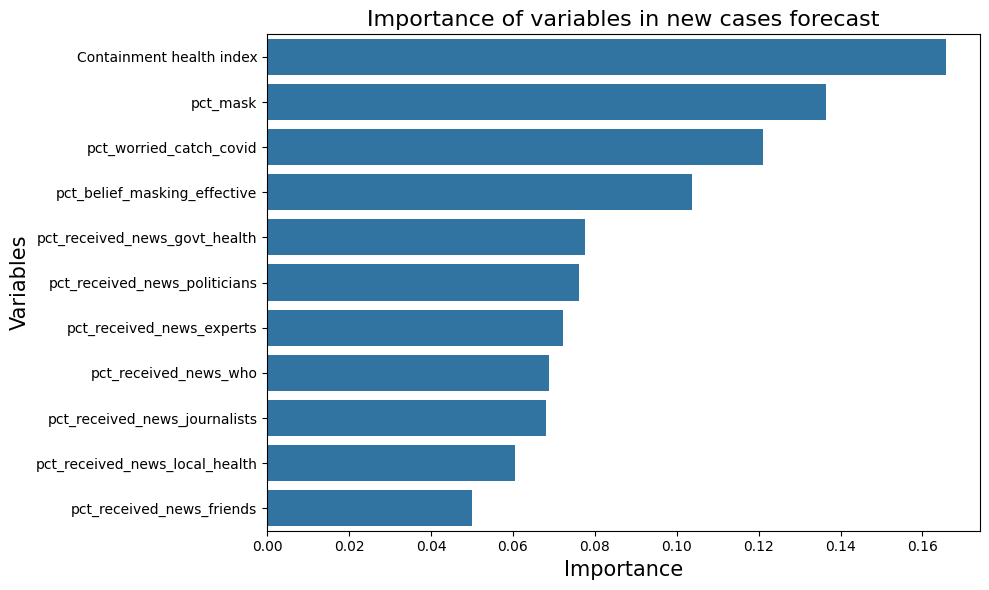

pct_mask                          0.136486
pct_worried_catch_covid           0.121023
pct_belief_masking_effective      0.103839
pct_received_news_local_health    0.060430
pct_received_news_experts         0.072219
pct_received_news_who             0.068696
pct_received_news_govt_health     0.077483
pct_received_news_politicians     0.076083
pct_received_news_journalists     0.068006
pct_received_news_friends         0.049982
Containment health index          0.165754
dtype: float64
=== PERFORMANCE RANDOM FOREST ===
R² Train: 0.835
R² Test:  0.744
MSE Train: 139865172.329
MSE Test:  211914442.232
OOB Score: 0.707
RMSE Train: 11826.461
RMSE Test:  14557.281


In [ ]:
# modello
rf = RandomForestRegressor(
    n_estimators=300,                
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42,
    oob_score=True
)
rf.fit(X_train, y_train) #addestra il modello usando i dati di training

# predizione
y_pred = rf.predict(X_test) #predice new cases guardando ai valori di input

# valutazione del modello
mse = mean_squared_error(y_test, y_pred) #percentuale di quanto sono in media lontane le previsioni del modello dai valori reali. (voglio basso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred) #quanto il modello spiega la variabilità dei dati reali (1 è perfetto, 0 il modello non spiega nulla) (voglio alto)
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Importanza delle variabili
importances = rf.feature_importances_ #feature_importances_ dice quanto ogni variabile aiuta a predire output nel modello
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)


plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.sort_values(ascending=False), y=feat_importances.sort_values(ascending=False).index)
plt.title("Importance of variables in new cases forecast", fontsize=16)
plt.xlabel("Importance", fontsize=15)
plt.ylabel("Variables", fontsize=15)
plt.tight_layout()
plt.savefig(r'C:\Users\user\Desktop\immaginitt\immparte2correlazione\randomforestcases.png', dpi=300, bbox_inches='tight')
plt.show()
print(feat_importances)


# Predizioni
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Metriche Train
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

# Metriche Test
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# OOB score
oob_score = rf.oob_score_

print("=== PERFORMANCE RANDOM FOREST ===")
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f"R² Train: {r2_train:.3f}")
print(f"R² Test:  {r2_test:.3f}")
print(f"MSE Train: {mse_train:.3f}")
print(f"MSE Test:  {mse_test:.3f}")
print(f"OOB Score: {oob_score:.3f}")
print(f"RMSE Train: {rmse_train:.3f}")
print(f"RMSE Test:  {rmse_test:.3f}")

In [29]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Bias-Variance decomposition
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    rf,        # modello
    X_train.values, y_train.values,  # training data
    X_test.values, y_test.values,    # test data
    loss='mse',
    num_rounds=50,   # numero di ripetizioni
    random_seed=42
)

print(f"Bias^2: {avg_bias:.3f}, Variance: {avg_var:.3f}, MSE: {avg_expected_loss:.3f}")


Bias^2: 236372538.762, Variance: 6909691.207, MSE: 243282229.969


In [30]:
print(y.describe())

count     13133.000000
mean      14411.994819
std       29054.741283
min           0.857000
25%        1004.000000
50%        4253.286000
75%       15733.714000
max      345291.857000
Name: new_cases_smoothed, dtype: float64


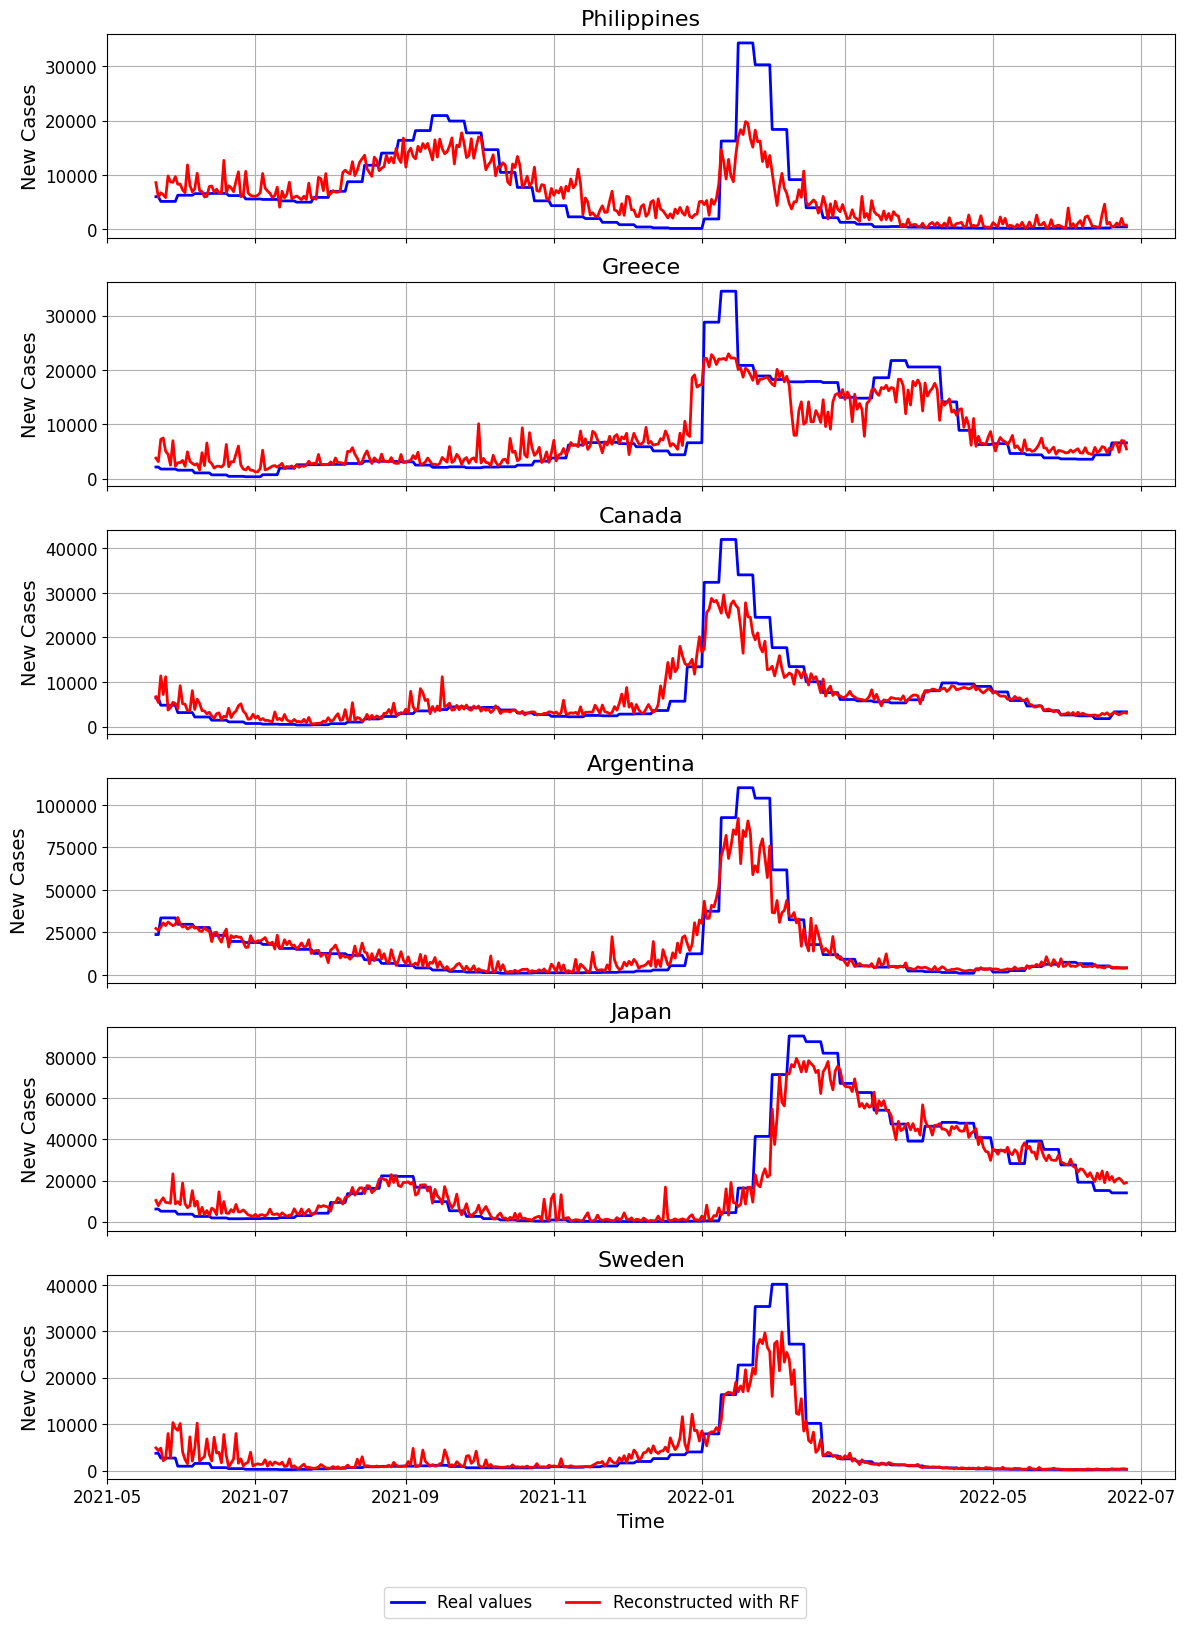

In [9]:
df = pd.read_csv('FULL_DATA5_FINALE.csv', parse_dates=['survey_date'])
selected_countries = ['Philippines', 'Greece', 'Canada', 'Argentina', 'Japan', 'Sweden']
save_path = r'C:\Users\user\Desktop\immaginitt\immparte2correlazione' 

# Modello Random Forest pronto da riutilizzare
#rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf = RandomForestRegressor(
    n_estimators=300,                
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42,
    oob_score=True
)
fig, axes = plt.subplots(len(selected_countries), 1, figsize=(12, 16), sharex=True)

for i, country in enumerate(selected_countries):
    df_country = df[df['country'] == country].copy()

    dl = df_country[['survey_date', 'pct_mask',
                     'pct_worried_catch_covid','pct_belief_masking_effective',
                     'pct_received_news_local_health','pct_received_news_experts','pct_received_news_who','pct_received_news_govt_health',
                     'pct_received_news_politicians','pct_received_news_journalists','pct_received_news_friends',
                     'new_cases_smoothed','new_deaths_smoothed','Containment health index']]

    dl = dl.dropna()

    date_col = dl['survey_date']
    y_all = dl['new_cases_smoothed']
    X_all = dl.drop(columns=['new_cases_smoothed', 'new_deaths_smoothed','survey_date'])

    rf.fit(X_all, y_all)
    y_pred_all = rf.predict(X_all)

    results_df = pd.DataFrame({
        'survey_date': date_col,
        'true_cases': y_all,
        'predicted_cases': y_pred_all
    }).sort_values('survey_date')

    ax = axes[i]

    ax.plot(results_df['survey_date'], results_df['true_cases'], label='Real values', color='blue', linewidth=2)
    ax.plot(results_df['survey_date'], results_df['predicted_cases'], label='Reconstructed with RF', color='red', linewidth=2)

    ax.set_title(f'{country}', fontsize=16)
    ax.set_ylabel('New Cases', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True)

axes[-1].set_xlabel('Time', fontsize=14)  # etichetta asse x solo nell’ultimo subplot

# Legenda unica sotto tutti i subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.03, 1, 1]) 
# Salvo la figura
fig.savefig(f'{save_path}\\rf_cases_all_countries.png', dpi=300, bbox_inches='tight')

plt.show()
